In [3]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import os
from glob import glob

In [6]:
outdir = os.path.abspath("../../out") + "/"
files = glob(outdir+"nc/*.nc")
files

['/home2/p321409/Projects/AGNI/out/nc/00000001.nc',
 '/home2/p321409/Projects/AGNI/out/nc/00000002.nc',
 '/home2/p321409/Projects/AGNI/out/nc/00000003.nc',
 '/home2/p321409/Projects/AGNI/out/nc/00000004.nc',
 '/home2/p321409/Projects/AGNI/out/nc/00000005.nc',
 '/home2/p321409/Projects/AGNI/out/nc/00000006.nc']

In [32]:
def read_spec(fpath):

    ds = nc.Dataset(fpath)

    Teff = float(str(ds["starfile"][:]).split("=")[1])

    wl_min = np.array(ds["bandmin"][:]) * 1e9 # nm
    wl_max = np.array(ds["bandmax"][:]) * 1e9

    wl_cen = (wl_min + wl_max) / 2
    wl_wid = (wl_max - wl_min)

    fl_SWD = np.array(ds["ba_D_SW"][1,:]) / wl_wid # W/m^2/nm

    ds.close()

    return wl_cen, fl_SWD, Teff



In [33]:
data = {}
for f in files:
    wav,flx,tmp = read_spec(f)

    print(f,tmp)
    data[tmp] = (wav,flx)

/home2/p321409/Projects/AGNI/out/nc/00000001.nc 3415.0
/home2/p321409/Projects/AGNI/out/nc/00000002.nc 3200.0
/home2/p321409/Projects/AGNI/out/nc/00000003.nc 3900.0
/home2/p321409/Projects/AGNI/out/nc/00000004.nc 4600.0
/home2/p321409/Projects/AGNI/out/nc/00000005.nc 5300.0
/home2/p321409/Projects/AGNI/out/nc/00000006.nc 6000.0


In [39]:
def wien(tmp):
    return 2898.0/tmp * 1e3

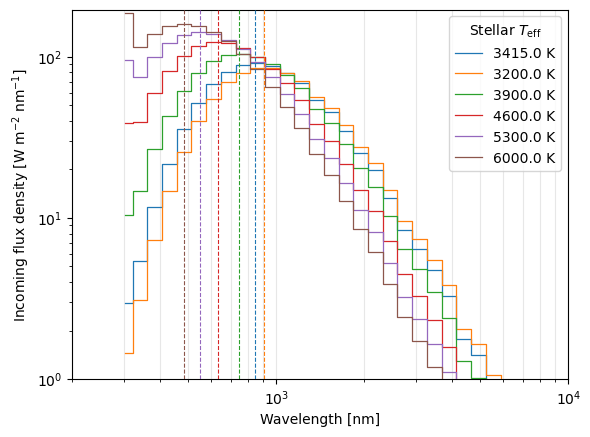

In [69]:
fig,ax = plt.subplots(1,1)

for tmp,(wav,flx) in data.items():

    # spectrum
    l = ax.step(wav, flx, label=f"{tmp:.1f} K", where='mid', lw=0.9, zorder=8)[0]

    # expected peak location
    c = l.get_color()
    ax.axvline(x=wien(tmp), color=c, ls='dashed', lw=0.8, zorder=10)


ax.set_xlim(left=200, right=10 * 1e3)
ax.set_xscale("log")
ax.set_xlabel("Wavelength [nm]")

ax.set_ylim(bottom=1)
ax.set_yscale("log")
ax.set_ylabel(r"Incoming flux density [W m$^{-2}$ nm$^{-1}$]")

ax.grid(zorder=-2, axis='x', which='both', alpha=0.3)

ax.legend(title=r"Stellar $T_\text{eff}$")
plt.show()